<a href="https://colab.research.google.com/github/norayehia/chatgpt-reviews-analyses/blob/main/chatgptml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChatGPT Tweets Sentiment Analysis.

## Table of Contents
* Data Preprocessing
* Data Visualization
* Model Selection
* Hyperparameter tuning

In [1]:
# Import data processing modules

import pandas as pd
import numpy as np

In [2]:
# Import sci-kit learn models for classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score, accuracy_score, f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/help/research/aireserchnlp/chatgpt/chdata/file.csv")

In [5]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


## Data Preprocessing

In [6]:
# Remove the 'Unnamed: 0' column

df = df[['tweets', 'labels']]

In [7]:
df.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [8]:
# View the first 10 rows in the tweets column

for i in df.tweets.head(10):
    print(i)
    print()

ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1

Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

As of 2 minutes ago, @OpenAI release

In [9]:
# Remove all the tweet links since they all begin with https:

df['tweet_list'] = df['tweets'].str.split('https:')

In [10]:
df.head()

,tweets,labels,tweet_list
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,[ChatGPT: Optimizing Language Models for Dialo...
1,"Try talking with ChatGPT, our new AI system wh...",good,"[Try talking with ChatGPT, our new AI system w..."
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,[ChatGPT: Optimizing Language Models for Dialo...
3,"THRILLED to share that ChatGPT, our new model ...",good,"[THRILLED to share that ChatGPT, our new model..."
4,"As of 2 minutes ago, @OpenAI released their ne...",bad,"[As of 2 minutes ago, @OpenAI released their n..."


In [11]:
# Select the text part of the list

text = [i[0] for i in df.tweet_list]

In [12]:
df['text'] = text

In [13]:
df = df[['text', 'labels']]

In [14]:
df.head()

,text,labels
0,ChatGPT: Optimizing Language Models for Dialogue,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialogue,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [15]:
# Import re for string processing

import re

In [16]:
# Remove all non-alphanumeric characters from the text list

string = r'[A-Za-z0-9 ]'

trim_list=[]

for row in text:
    s=''
    for letter in row:
        if bool(re.match(string, letter)):
            s+=letter
    trim_list.append(s)

In [17]:
# Remove the non-printing characters from text

rep_list = ['\U0001fae1', '\\n', '@', '#', '\xa0', '***']

for i in trim_list:
    for j in rep_list:
        if j in i:
            i.replace(j,'')

In [18]:
df['text'] = trim_list

In [19]:
df.head()

,text,labels
0,ChatGPT Optimizing Language Models for Dialogue,neutral
1,Try talking with ChatGPT our new AI system whi...,good
2,ChatGPT Optimizing Language Models for Dialogue,neutral
3,THRILLED to share that ChatGPT our new model o...,good
4,As of 2 minutes ago OpenAI released their new ...,bad


In [20]:
# Map the labels to integers
# 1 for good tweet
# 0 for neutral tweet
# -1 for bad tweet

df['lab_int'] = np.where(df['labels']=='good', 1, np.where(df['labels']=='bad', -1, 0))

## Data Visualization with word cloud

In [21]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
 
comment_words = ''
stopwords = set(STOPWORDS)
 

for val in df.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
mask = np.array(Image.open("/kaggle/input/masks/comment.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='pink',
                stopwords = stopwords,
                min_font_size = 10, mask=mask).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#preprocessin &feature engineering

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['lab_int'], test_size=0.3, random_state=1)

In [23]:
vec = CountVectorizer(
    ngram_range=(1, 3), 
    stop_words="english",
)

X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

## Model Selection

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

preds1 =clf.predict(X_test)
print(classification_report(y_test, preds1))


              precision    recall  f1-score   support

          -1       0.49      1.00      0.66     32288
           0       0.00      0.00      0.00     16710
           1       0.00      0.00      0.00     16791

    accuracy                           0.49     65789
   macro avg       0.16      0.33      0.22     65789
weighted avg       0.24      0.49      0.32     65789



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


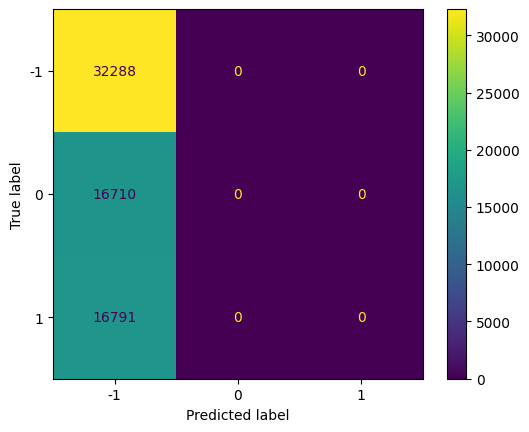

In [27]:
cm = confusion_matrix(y_test, preds1, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()


In [28]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

predsn = nb.predict(X_test)
print(classification_report(y_test, predsn))

              precision    recall  f1-score   support

          -1       0.76      0.93      0.83     32288
           0       0.72      0.29      0.41     16710
           1       0.66      0.77      0.71     16791

    accuracy                           0.72     65789
   macro avg       0.71      0.66      0.65     65789
weighted avg       0.72      0.72      0.69     65789



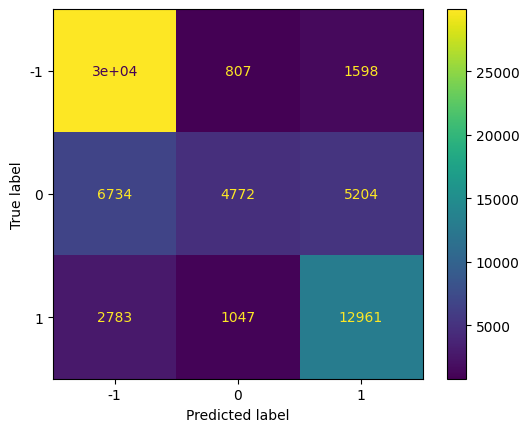

In [29]:
cm = confusion_matrix(y_test, predsn, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=nb.classes_)
disp.plot()

plt.show()

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)

predsl = log.predict(X_test)

In [31]:
print(classification_report(y_test, predsl))

              precision    recall  f1-score   support

          -1       0.86      0.94      0.90     32288
           0       0.74      0.65      0.69     16710
           1       0.83      0.79      0.81     16791

    accuracy                           0.83     65789
   macro avg       0.81      0.79      0.80     65789
weighted avg       0.82      0.83      0.83     65789



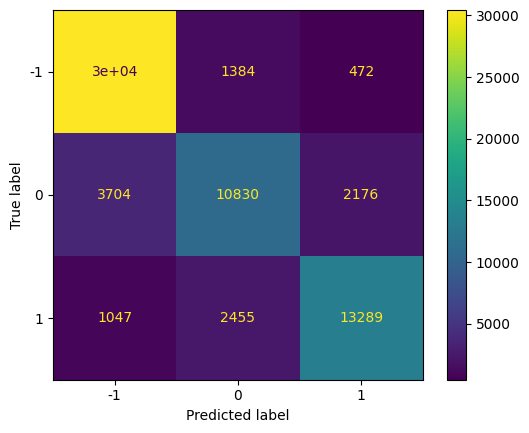

In [32]:
cm = confusion_matrix(y_test, predsl, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

## Hyperparameter tuning

In [29]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [30]:
# Hyperparameter tuning for Multinomial Naive Bayes model

param_grid = {"alpha": [0.1,0,1.0, 10, 100]}

grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.4s
[CV] END ..........................................alpha=0.1; total time=   0.4s
[CV] END ..........................................alpha=0.1; total time=   0.4s
[CV] END ..........................................alpha=0.1; total time=   0.4s
[CV] END ..........................................alpha=0.1; total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.4s
[CV] END ..........................................alpha=1.0; total time=   0.4s
[CV] END ..........................................alpha=1.0; total time=   0.4s
[CV] END ..........................................alpha=1.0; total time=   0.4s
[CV] END ..........................................alpha=1.0; total time=   0.4s
[CV] END ..........................................alpha=1.0; total time=   0.5s
[CV] END ...........................................alpha=10; total time=   0.4s
[CV] END ...........................................alpha=10; total time=   0.5s
[CV] END ...........................................alpha=10; total time=   0.5s
[CV] END ...........................................alpha=10; total time=   0.5s
[CV] END ...........................................alpha=10; total time=   0.5s
[CV] END ..........................................alpha=100; total time=   0.5s
[CV] END ...................

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0, 1.0, 10, 100]}, verbose=2)